In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [14]:
data=pd.read_csv("./datasets_tf/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Text(0, 0.5, 'Frequency')

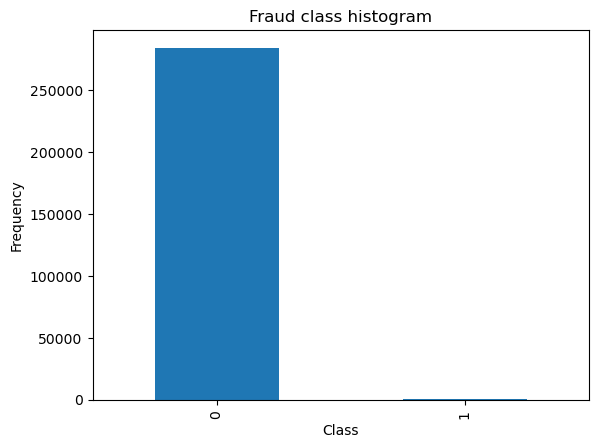

In [15]:
count_classes=pd.value_counts(data['Class'], sort=True).sort_index()
# sorts the counts of unique values based on index(typically 0 and 1)
count_classes.plot(kind='bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
data['normAmount']= StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data=data.drop(['Time','Amount'],axis=1)
data.head()
# time amount 제거하고 norm 된 amount 추가

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [18]:
X=data.loc[:,data.columns !='Class']
y=data.loc[:,data.columns == 'Class']

#loc: index에 따라서 분류 즉 label
#iloc: 데이터 순서 즉 integer position

print(X)
print(y)

               V1         V2        V3        V4        V5        V6  \
0       -1.359807  -0.072781  2.536347  1.378155 -0.338321  0.462388   
1        1.191857   0.266151  0.166480  0.448154  0.060018 -0.082361   
2       -1.358354  -1.340163  1.773209  0.379780 -0.503198  1.800499   
3       -0.966272  -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4       -1.158233   0.877737  1.548718  0.403034 -0.407193  0.095921   
...           ...        ...       ...       ...       ...       ...   
284802 -11.881118  10.071785 -9.834783 -2.066656 -5.364473 -2.606837   
284803  -0.732789  -0.055080  2.035030 -0.738589  0.868229  1.058415   
284804   1.919565  -0.301254 -3.249640 -0.557828  2.630515  3.031260   
284805  -0.240440   0.530483  0.702510  0.689799 -0.377961  0.623708   
284806  -0.533413  -0.189733  0.703337 -0.506271 -0.012546 -0.649617   

              V7        V8        V9       V10  ...       V20       V21  \
0       0.239599  0.098698  0.363787  0.090794  ...  0.25141

In [19]:
# num of data points in minority class
number_records_fraud=len(data[data.Class==1])
fraud_indices=np.array(data[data.Class==1].index)

print(number_records_fraud)
print(fraud_indices)

492
[   541    623   4920   6108   6329   6331   6334   6336   6338   6427
   6446   6472   6529   6609   6641   6717   6719   6734   6774   6820
   6870   6882   6899   6903   6971   8296   8312   8335   8615   8617
   8842   8845   8972   9035   9179   9252   9487   9509  10204  10484
  10497  10498  10568  10630  10690  10801  10891  10897  11343  11710
  11841  11880  12070  12108  12261  12369  14104  14170  14197  14211
  14338  15166  15204  15225  15451  15476  15506  15539  15566  15736
  15751  15781  15810  16415  16780  16863  17317  17366  17407  17453
  17480  18466  18472  18773  18809  20198  23308  23422  26802  27362
  27627  27738  27749  29687  30100  30314  30384  30398  30442  30473
  30496  31002  33276  39183  40085  40525  41395  41569  41943  42007
  42009  42473  42528  42549  42590  42609  42635  42674  42696  42700
  42741  42756  42769  42784  42856  42887  42936  42945  42958  43061
  43160  43204  43428  43624  43681  43773  44001  44091  44223  44270
  

In [20]:
# normal classes에서 indices 따오기
normal_indices=data[data.Class==0].index
print(normal_indices)

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            284797, 284798, 284799, 284800, 284801, 284802, 284803, 284804,
            284805, 284806],
           dtype='int64', length=284315)


In [21]:
# normal 중에서 fraud 개수 만큼 랜덤 초이스
random_normal_indices=np.random.choice(normal_indices,number_records_fraud,replace=False)
random_normal_indices=np.array(random_normal_indices)

# 합치기
under_sample_indices=np.concatenate([fraud_indices,random_normal_indices])
under_sample_data=data.iloc[under_sample_indices,:]
print(random_normal_indices)
print(len(random_normal_indices))
print(under_sample_indices)
print(under_sample_data) # 걍 순서대로 이어붙였네 class1> class0 

[145981  62054 210612 219265 215138  52399 224638 155722 284515  99515
 284370 171692 143975 153669   8091  40471  42537 170411 205960   9200
  58777 277736  62949 189225  66752 205582  71098 282763 217458 235515
 160915 260403 113238  65773 149003 148177 104192  29869 267216  80226
 267115 115786 275987 232127  66430 131523 276428 183799 213927 173683
  13798 149388 128109 177171 151634 184365  78981 179250 190525 102063
  53110 164769  83612    371 149214 118683  62349 166524 215440 188656
 218853   9322 219750 257418  16034 148430  21701  15895 280250  48636
 151536 217806  89212  62714 185371   9465 248058  20229  35153 233832
  34121 274795 232003 281469  52272  37990 207340 181522 166841  30048
  38290 100296   1022  56464 176158 162313 232217 192479  62758 241662
 183374  86032  87406  67382 128372   6504 245099  83231   4110  80791
 127075 144685 226502 272660 132016 147244 194522  16024 122200 272357
  49141 200027 189927 184621 188692 141507  20871 245906  66956 121886
 21284

In [22]:
#under sample dataset 분할
X_undersample=under_sample_data.loc[:,under_sample_data.columns !='Class']
y_undersample=under_sample_data.loc[:,under_sample_data.columns == 'Class']

print("Percentage of normal transactions: ", len(under_sample_data[under_sample_data.Class ==0])/len(under_sample_data))
print("Percentage of fraud transactions: ", len(under_sample_data[under_sample_data.Class==1])/len(under_sample_data))
print("Total num of transactions in resampled data: ", len(under_sample_data))

Percentage of normal transactions:  0.5
Percentage of fraud transactions:  0.5
Total num of transactions in resampled data:  984


In [23]:
# train, test 로 나누기
from sklearn.model_selection import train_test_split

#whole dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

print("Number transactions train dataset: ", len(X_train))
print("Number transactions test dataset: ", len(X_test))
print("Total num of transactions: ", len(X_train)+len(X_test))

# undersampled dataset
X_train_undersample,X_test_undersample, y_train_undersample,y_test_undersample=train_test_split(X_undersample,y_undersample, test_size=0.3,random_state=0)
print()
print("num transactions of undersampled train dataset: ",len(X_train_undersample))
print("num transactions of undersampled test dataset: ",len(X_test_undersample))
print("Total num of undersampled transactions: ",len(X_train_undersample)+len(X_test_undersample))

Number transactions train dataset:  199364
Number transactions test dataset:  85443
Total num of transactions:  284807

num transactions of undersampled train dataset:  688
num transactions of undersampled test dataset:  296
Total num of undersampled transactions:  984


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report 


In [87]:
# kfold 실행
def printing_Kfold_scores(x_train_data,y_train_data):
    fold=KFold(n_splits=5,shuffle=False)
    
    # different C params
    c_param_range=[0.01,0.1,1,10,100]
    
    results_table=pd.DataFrame(index=range(len(c_param_range),2), columns=['C_parameter','Mean recall score'])
    results_table['C_parameter']=c_param_range
    
    
    for c_param in c_param_range:
        print('----------------------------')
        print('C parameter: ', c_param)
        print('------------------------------')
        print('')
        
        recall_accs=[]
        
        for j, (train_index,test_index) in enumerate(fold.split(x_train_data),start=1):
            lr=LogisticRegression(C=c_param,penalty='l1',solver='liblinear')
            lr.fit(x_train_data.iloc[train_index,:],y_train_data.iloc[train_index,:].values.ravel())
            y_pred_undersample=lr.predict(x_train_data.iloc[test_index,:].values)
            # fold라는 데이터를 1 부터 시작해랴
            
            
            # recall score 계산하고 recall_acc에 포함시키기
            recall_acc=recall_score(y_train_data.iloc[test_index,:].values,y_pred_undersample)
            recall_accs.append(recall_acc) #삽입하는 코드
            print('Iteration ',j,': recall score = ', recall_acc)
            
        results_table.loc[j,'Mean recall score']=np.mean(recall_accs)
        print('')
        print('Mean recall score ',np.mean(recall_accs))
        
        print('')
    
 
    best_c = results_table.loc[results_table[j,'Mean recall score'].idxmax()]['C_parameter'] #최댓값 반환
            
    print('***********************')
    print('Best c parameter= ',best_c)
    print('*************************')
            
    return best_c
            
    
            
        
    
    

In [88]:
best_c=printing_Kfold_scores(X_train_undersample,y_train_undersample)

----------------------------
C parameter:  0.01
------------------------------

Iteration  1 : recall score =  0.9315068493150684
Iteration  2 : recall score =  0.9178082191780822
Iteration  3 : recall score =  1.0
Iteration  4 : recall score =  0.9594594594594594
Iteration  5 : recall score =  0.9696969696969697

Mean recall score  0.955694299529916

----------------------------
C parameter:  0.1
------------------------------

Iteration  1 : recall score =  0.8493150684931506
Iteration  2 : recall score =  0.863013698630137
Iteration  3 : recall score =  0.9322033898305084
Iteration  4 : recall score =  0.9324324324324325
Iteration  5 : recall score =  0.9090909090909091

Mean recall score  0.8972110996954274

----------------------------
C parameter:  1
------------------------------

Iteration  1 : recall score =  0.863013698630137
Iteration  2 : recall score =  0.9041095890410958
Iteration  3 : recall score =  0.9661016949152542
Iteration  4 : recall score =  0.9459459459459459
It

C:\Users\tlsdu\anaconda3\envs\mine\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\tlsdu\anaconda3\envs\mine\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\tlsdu\anaconda3\envs\mine\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\tlsdu\anaconda3\envs\mine\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\tlsdu\anaconda3\envs\mine\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid fea

KeyError: (5, 'Mean recall score')

In [74]:
results_table,Mean_recall_score=

NameError: name 'Mean_recall_score' is not defined

In [ ]:
best_c=results_table.loc[results_table.loc['Mean recall score'].idxmax()]['C_parameter'] #최댓값 반환
            
    print('***********************')
    print('Best c parameter= ',best_c)
    print('*************************')
            
    return best_c

In [47]:
X= np.array([[1,2],[3,4],[1,2],[3,4]])
y=np.array([1,2,3,4])
kf=KFold(n_splits=2)
print(kf)
print()

for i, (train_index, test_index) in enumerate(kf.split(X),start=1):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

KFold(n_splits=2, random_state=None, shuffle=False)

Fold 1:
  Train: index=[2 3]
  Test:  index=[0 1]
Fold 2:
  Train: index=[0 1]
  Test:  index=[2 3]


In [51]:
fold=KFold(n_splits=5,shuffle=False)
    
# different C params
c_param_range=[0.01,0.1,1,10,100]
    
results_table=pd.DataFrame(index=range(len(c_param_range),2), columns=['C_parameter','Mean recall score'])
results_table['C_parameter']=c_param_range
    
    
for c_param in c_param_range:
    print('----------------------------')
    print('C parameter: ', c_param)
    print('------------------------------')
    print('')
    recall_accs=[]
    for i, (train_index, test_index) in enumerate(fold.split(X_train_undersample),start=1):
        print(f"Fold {i}:")
        print(f"  Train: index={train_index}")
        print(f"  Test:  index={test_index}")
        print()
        print()

----------------------------
C parameter:  0.01
------------------------------

Fold 1:
  Train: index=[138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155
 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173
 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191
 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209
 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227
 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245
 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263
 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281
 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299
 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317
 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335
 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350 351 352 353
 354 355 356 357 358 

In [52]:
print(X_train_undersample)

              V1        V2        V3        V4        V5        V6        V7  \
6870   -1.863756  3.442644 -4.468260  2.805336 -2.118412 -2.332285 -4.261237   
276598 -0.946277  1.455359  0.161112 -0.639279  0.296635 -0.412010  0.781167   
260403  1.918537 -0.489679 -0.455350  0.510415 -0.561650 -0.263164 -0.537871   
214775 -0.395582 -0.751792 -1.984666 -0.203459  1.903967 -1.430289 -0.076548   
149145 -2.405580  3.738235 -2.317843  1.367442  0.394001  1.919938 -3.106942   
...          ...       ...       ...       ...       ...       ...       ...   
31819  -0.852226  1.094649  1.703807  0.025856 -0.094494 -0.405145  0.601865   
79536  -0.264869  3.386140 -3.454997  4.367629  3.336060 -2.053918  0.256890   
245906 -3.345002  0.497938 -0.522928 -0.234647 -0.099495 -0.232643 -1.162330   
166524 -0.436518  0.619437  0.159033 -0.824800  0.943903 -0.951905  1.153002   
77100  -0.761303  0.062272 -0.516378 -2.188068  2.785486  2.927782  0.163577   

               V8        V9       V10  